Oncelikle Ortami Hazirliyorum.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Advertising.csv')
df = df.iloc[:, 1:len(df)]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### 📊 Veri Setinin İçeriği
Veri seti, her satırı bir reklam kampanyasını temsil eden ve aşağıdaki sütunları içeren 200 gözlemden oluşmaktadır:​

* TV: Televizyon reklamlarına yapılan harcama (bin dolar cinsinden)

* Radio: Radyo reklamlarına yapılan harcama (bin dolar cinsinden)

* Newspaper: Gazete reklamlarına yapılan harcama (bin dolar cinsinden)

* Sales: Yapılan satış miktarı (bin birim cinsinden)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [4]:
df.info() # Eksik veri var mı?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# oncelikle hedef degiskeni belirleyelim
# Hedef değişken: Sales
# Bağımsız değişkenler: TV, Radio, Newspaper

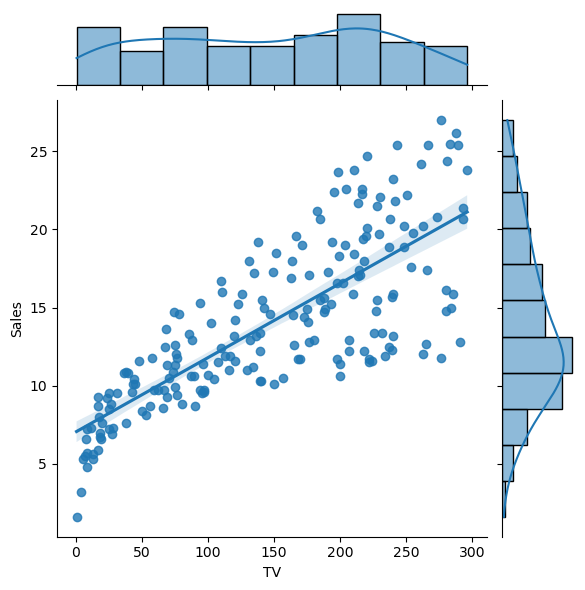

In [6]:
sns.jointplot(x='TV', y='Sales', data=df, kind='reg');

In [7]:
# TV ile Sales arasında pozitif bir ilişki var gibi görünüyor.
X = df[['TV']] # Bağımsız değişken dataframe olarak aldik
y = df['Sales'] # Hedef değişken

In [8]:
reg = LinearRegression()

In [9]:
model = reg.fit(X, y) # Modeli eğitiyoruz

In [10]:
model.intercept_ # Y eksenini kestiği nokta (b0)

7.032593549127694

In [11]:
model.coef_ # Eğim (b1)

array([0.04753664])

In [13]:
model.score(X, y) # Modelin R^2 değeri
# Modelin R^2 değeri 0.611, bu da modelin %61.1 oranında açıklayıcı güce sahip olduğunu gösteriyor. ORTA

0.611875050850071

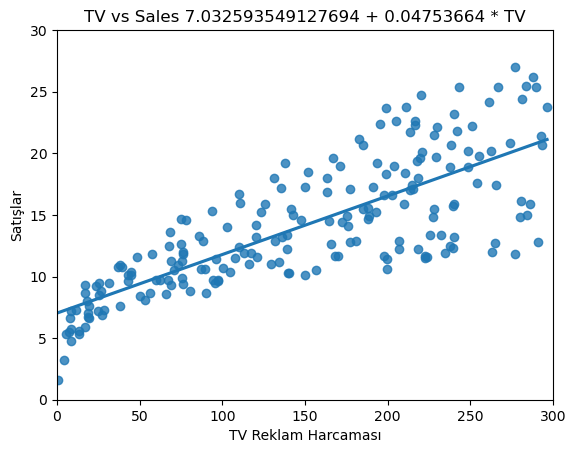

In [14]:
g = sns.regplot(x='TV', y='Sales', data=df, ci=None) # TV ile Sales arasındaki ilişkiyi gösteren regresyon grafik
g.set_title('TV vs Sales 7.032593549127694 + 0.04753664 * TV')
g.set_xlabel('TV Reklam Harcaması')
g.set_ylabel('Satışlar')
plt.xlim(0, 300) # TV harcaması 0-300 arası
plt.ylim(0, 30) # Satışlar 0-30 arası
plt.show()

DENKLEM = **7.032593549127694 + 0.04753664 * TV**

In [17]:
Deneme_1 = model.predict([[100]]) # Modeli kullanarak tahmin yapıyoruz
Deneme_1

c:\Users\emirh\anaconda3\envs\py-3-10-env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.78625759])

In [25]:
yeni_veri = pd.DataFrame({'TV': [5,50,150]})
model.predict(yeni_veri) # Yeni veriler için tahmin yapıyoruz
# 5, 50 ve 150 TV harcaması için satış tahminleri

array([ 7.27027675,  9.40942557, 14.16308961])

ARTIKLARI HESAPLAYALIM

In [26]:
gercek_y = y.head(10) # Gerçek satış değerleri

In [27]:
tahmin_y = pd.DataFrame(model.predict(X)[0:10]) # İlk 10 gözlem için tahmin edilen satış değerleri

In [28]:
hatalar = pd.concat([gercek_y, tahmin_y], axis=1) # Gerçek ve tahmin edilen değerleri birleştiriyoruz
hatalar.columns = ['Gercek_Satis', 'Tahmin_Satis'] # Sütun isimlerini değiştiriyoruz

In [29]:
hatalar

,Gercek_Satis,Tahmin_Satis
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [32]:
hatalar['hata'] = hatalar['Gercek_Satis'] - hatalar['Tahmin_Satis'] # Hataları hesaplıyoruz

hatalar

,Gercek_Satis,Tahmin_Satis,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [33]:
hatalar['hatalar_kare'] = hatalar['hata'] ** 2 # Hataların karelerini alıyoruz
hatalar

,Gercek_Satis,Tahmin_Satis,hata,hatalar_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [34]:
hatalar['hatalar_kokleri'] = np.sqrt(hatalar['hatalar_kare']) # Hataların karekökünü alıyoruz
hatalar

,Gercek_Satis,Tahmin_Satis,hata,hatalar_kare,hatalar_kokleri
0,22.1,17.970775,4.129225,17.050503,4.129225
1,10.4,9.147974,1.252026,1.567569,1.252026
2,9.3,7.850224,1.449776,2.101851,1.449776
3,18.5,14.234395,4.265605,18.195390,4.265605
4,12.9,15.627218,-2.727218,7.437719,2.727218
5,7.2,7.446162,-0.246162,0.060596,0.246162
6,11.8,9.765950,2.034050,4.137358,2.034050
7,13.2,12.746498,0.453502,0.205664,0.453502
8,4.8,7.441409,-2.641409,6.977040,2.641409
9,10.6,16.530414,-5.930414,35.169814,5.930414


In [35]:
np.mean(hatalar['hatalar_kokleri']) # Ortalama hata (MAE) hesaplıyoruz

2.5129388421137913

In [36]:
np.mean(hatalar['hatalar_kare']) # Ortalama kare hata (MSE) hesaplıyoruz

9.290350329638105

In [38]:
np.sqrt(hatalar['hatalar_kare'].mean()) # Ortalama kare hatayı hesaplıyoruz (RMSE)

3.048007599996776

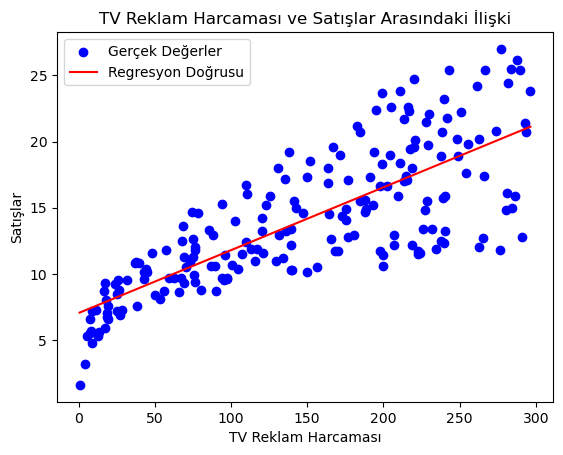

In [39]:
X_range = np.linspace(X.min(), X.max(), 100) # X değerlerini 100 eşit parçaya bölüyoruz

y_line = 7.032593549127694 + 0.04753664 * X_range # Regresyon doğrusunu hesaplıyoruz

plt.scatter(X, y, color='blue', label='Gerçek Değerler') # Gerçek değerleri çiziyoruz
plt.plot(X_range, y_line, color='red', label='Regresyon Doğrusu') # Regresyon doğrusunu çiziyoruz
plt.title('TV Reklam Harcaması ve Satışlar Arasındaki İlişki')
plt.xlabel('TV Reklam Harcaması')
plt.ylabel('Satışlar')
plt.legend() # Efsane ekliyoruz
plt.show() # Grafiği gösteriyoruz
# TV Reklam Harcaması ve Satışlar Arasındaki İlişki


b0 = 7.032593549127694 \
b1 = 0.04753664 \
x = TV \
R^2 = 0.611875050850071 \
MAE = 2.5129388421137913 \
MSE = 9.290350329638105 \
RMSE = 3.048007599996776 

FORMUL = **7.032593549127694 + 0.04753664 * TV**

### **Sonuç Olarak Ne Çıkar?**

- TV harcamaları satışları artırıyor (pozitif ilişki).

- Ancak bu ilişki çok güçlü değil (b1 küçük).

- Model satışların %61'ini açıklıyor, gayet iyi.

- Ortalama 2.5-3 birimlik hata ile tahmin yapıyor, makul.

